In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/La_Liga_23_24_season_data.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Team
0,0,2023-08-12,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,0.0,...,Jesús Gil,Match Report,NaN,14.0,8.0,16.0,2.0,0,0,Real Madrid
1,1,2023-08-19,19:30,La Liga,Matchweek 2,Sat,Away,W,3.0,1.0,...,José Sánchez,Match Report,NaN,25.0,9.0,17.0,1.0,0,0,Real Madrid
2,2,2023-08-25,21:30,La Liga,Matchweek 3,Fri,Away,W,1.0,0.0,...,Isidro Díaz de Mera,Match Report,NaN,9.0,2.0,19.4,0.0,0,1,Real Madrid
3,3,2023-09-02,16:15,La Liga,Matchweek 4,Sat,Home,W,2.0,1.0,...,Mario Melero,Match Report,NaN,26.0,12.0,17.7,0.0,0,0,Real Madrid
4,4,2023-09-17,21:00,La Liga,Matchweek 5,Sun,Home,W,2.0,1.0,...,César Soto,Match Report,NaN,17.0,8.0,15.9,1.0,0,0,Real Madrid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    602 non-null    int64  
 1   Date          602 non-null    object 
 2   Time          602 non-null    object 
 3   Comp          602 non-null    object 
 4   Round         602 non-null    object 
 5   Day           602 non-null    object 
 6   Venue         602 non-null    object 
 7   Result        602 non-null    object 
 8   GF            602 non-null    float64
 9   GA            602 non-null    float64
 10  Opponent      602 non-null    object 
 11  xG            602 non-null    float64
 12  xGA           602 non-null    float64
 13  Poss          602 non-null    float64
 14  Attendance    602 non-null    float64
 15  Captain       602 non-null    object 
 16  Formation     602 non-null    object 
 17  Referee       602 non-null    object 
 18  Match Report  602 non-null    

In [5]:
df.describe()

,Unnamed: 0,GF,GA,xG,xGA,Poss,Attendance,Notes,Sh,SoT,Dist,FK,PK,PKatt
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,0.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,17.858804,1.302326,1.302326,1.293522,1.293522,50.001661,29191.933555,NaN,12.089701,4.071429,17.804153,0.450166,0.101329,0.132890
std,11.548422,1.209348,1.209348,0.759110,0.759110,11.236010,17276.653857,NaN,4.873296,2.412505,3.536070,0.695846,0.323302,0.363402
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,7623.000000,NaN,1.000000,0.000000,8.100000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.700000,0.700000,42.000000,16041.000000,NaN,9.000000,2.000000,15.600000,0.000000,0.000000,0.000000
50%,17.000000,1.000000,1.000000,1.200000,1.200000,50.000000,20354.000000,NaN,12.000000,4.000000,17.500000,0.000000,0.000000,0.000000
75%,28.000000,2.000000,2.000000,1.700000,1.700000,58.000000,42848.000000,NaN,15.000000,5.000000,19.775000,1.000000,0.000000,0.000000
max,44.000000,7.000000,7.000000,4.600000,4.600000,80.000000,76732.000000,NaN,31.000000,13.000000,40.500000,3.000000,2.000000,2.000000


In [6]:
# Some columns are unnecessary and don't provide any insights into the analysis. We need to drop them. 
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Team'],
      dtype='object')

In [8]:
# Columns like Date, Time, Attendance, Notes etc. don't play any role in the analysis

df_updated = df.copy(deep=True)
df_updated = df_updated.drop(columns=["Unnamed: 0", "Date", "Time", "Day", "Venue", "Attendance", "Referee", "Notes", "Captain"])
df_updated.columns

Index(['Comp', 'Round', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss',
       'Formation', 'Match Report', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt',
       'Team'],
      dtype='object')

### Visualisations

In [13]:
# Let's check which team won the most till date
df_updated["Result"].value_counts()

Result
W    213
L    213
D    176
Name: count, dtype: int64

In [50]:
results = []
for team in df_updated["Team"].unique():
    result_counts = df_updated[df_updated["Team"] == team][["Team", "Result"]].groupby("Team").value_counts().reset_index()
    results.append(result_counts)

team_results = pd.DataFrame(pd.concat(results)).sort_values(by="count", ascending=False)
team_results.head()

,Team,Result,count
0,Real Madrid,W,23
0,Girona,W,20
0,Barcelona,W,20
0,Granada,L,20
0,Almeria,L,19


In [57]:
team_win_counts = team_results[team_results["Result"] == "W"]
team_win_counts

,Team,Result,count
0,Real Madrid,W,23
0,Girona,W,20
0,Barcelona,W,20
0,Atletico Madrid,W,18
0,Athletic Club,W,16
0,Real Sociedad,W,13
0,Valencia,W,12
1,Osasuna,W,11
1,Real Betis,W,11
1,Villarreal,W,10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


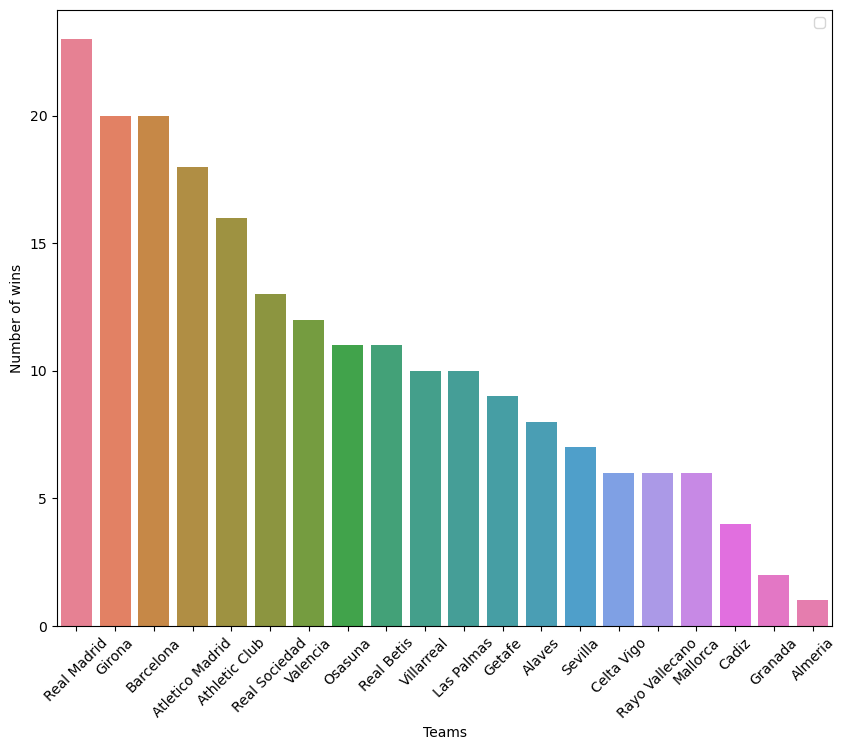

In [64]:
teams = team_win_counts["Team"].unique()

plt.figure(figsize=(10, 8))
sns.barplot(x=teams, y=team_win_counts["count"], hue=teams, )
plt.xticks(ticks=teams, rotation=45)
plt.xlabel("Teams")
plt.ylabel("Number of wins")
plt.show()
